## Importación de librerías

In [1]:
# Importación de librerías
# -----------------------------------------------------------------------
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_utils as du
        
# Configuración de Pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Para visualizar todas las columnas de los DataFrames

## Carga de datos y unión de las tablas
Se unen las tablas en una sola con datos del 2011 al 2018

In [2]:
# Carga y unión de archivos
df1 = pd.read_csv('../Data/motor_data11-14lats.csv')
df2 = pd.read_csv('../Data/motor_data14-2018.csv')
df = pd.concat([df1, df2])


# Guardar el archivo asegurando que OBJECT_ID se mantenga como índice en el CSV
df.to_csv('../Data/motor_data_2011_2018.csv', index=False)

# Confirmación de la carga y unión
df.head()


,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


## Análisis exploratorio

In [3]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 802036, y el número de columnas es 16


In [4]:
df.columns

Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802036 entries, 0 to 508498
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                802036 non-null  int64  
 1   INSR_BEGIN         802036 non-null  object 
 2   INSR_END           802036 non-null  object 
 3   EFFECTIVE_YR       802032 non-null  object 
 4   INSR_TYPE          802036 non-null  int64  
 5   INSURED_VALUE      802036 non-null  float64
 6   PREMIUM            802015 non-null  float64
 7   OBJECT_ID          802036 non-null  int64  
 8   PROD_YEAR          801867 non-null  float64
 9   SEATS_NUM          801801 non-null  float64
 10  CARRYING_CAPACITY  603837 non-null  float64
 11  TYPE_VEHICLE       802036 non-null  object 
 12  CCM_TON            802028 non-null  float64
 13  MAKE               802031 non-null  object 
 14  USAGE              802036 non-null  object 
 15  CLAIM_PAID         60145 non-null   float64
dtypes: floa

## cambio de los tipos de datos de las columnas

In [6]:
# uso de la function convertir_columnas_a_datetime

# Cambiar a tipo fecha
df = du.convertir_columnas_a_datetime(df, ['INSR_BEGIN', 'INSR_END'])

# EFFECTIVE_YR: completar el año y cambiar a int
# Asumiendo que tiene valores tipo "24", "23", etc.
df['EFFECTIVE_YR'] = df['EFFECTIVE_YR'].astype(str).str.zfill(2)    # Asegura que tenga dos dígitos
df['EFFECTIVE_YR'] = '20' + df['EFFECTIVE_YR']                      # Prepend "20"
df['EFFECTIVE_YR'] = pd.to_numeric(df['EFFECTIVE_YR'], errors='coerce').astype('Int64')  # Pasa a int

# PROD_YEAR: float a int
df['PROD_YEAR'] = df['PROD_YEAR'].astype('Int64')

# SEATS_NUM: float a int
df['SEATS_NUM'] = df['SEATS_NUM'].astype('Int64')

## Datos duplicados
Objet_ID es el identificador único de un Vehiculo, un vehiculo puede tener varias polizas

In [7]:
# Se eliminan los registros duplicados Exactos
df.drop_duplicates(inplace=True)

## Identificación de nulos

In [8]:
df.isna().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR           1171
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  21
OBJECT_ID                 0
PROD_YEAR               169
SEATS_NUM               235
CARRYING_CAPACITY    198162
TYPE_VEHICLE              0
CCM_TON                   8
MAKE                      5
USAGE                     0
CLAIM_PAID           741693
dtype: int64

In [9]:
du.verificar_columnas_con_nan(df, df.columns.tolist())


Columna 'SEX' NO tiene valores NaN.
Columna 'INSR_BEGIN' NO tiene valores NaN.
Columna 'INSR_END' NO tiene valores NaN.
Columna 'EFFECTIVE_YR' SÍ tiene valores NaN: 1171 (0.15%)
Columna 'INSR_TYPE' NO tiene valores NaN.
Columna 'INSURED_VALUE' NO tiene valores NaN.
Columna 'PREMIUM' SÍ tiene valores NaN: 21 (0.00%)
Columna 'OBJECT_ID' NO tiene valores NaN.
Columna 'PROD_YEAR' SÍ tiene valores NaN: 169 (0.02%)
Columna 'SEATS_NUM' SÍ tiene valores NaN: 235 (0.03%)
Columna 'CARRYING_CAPACITY' SÍ tiene valores NaN: 198162 (24.71%)
Columna 'TYPE_VEHICLE' NO tiene valores NaN.
Columna 'CCM_TON' SÍ tiene valores NaN: 8 (0.00%)
Columna 'MAKE' SÍ tiene valores NaN: 5 (0.00%)
Columna 'USAGE' NO tiene valores NaN.
Columna 'CLAIM_PAID' SÍ tiene valores NaN: 741693 (92.50%)


['EFFECTIVE_YR',
 'PREMIUM',
 'PROD_YEAR',
 'SEATS_NUM',
 'CARRYING_CAPACITY',
 'CCM_TON',
 'MAKE',
 'CLAIM_PAID']

### Identificar variables numéricas, categóricas y tipo fecha

In [10]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
date_cols = df.select_dtypes(include=['datetime']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)
print("\nVariables de fecha:\n\n", date_cols)

Variables numéricas:

 Index(['SEX', 'EFFECTIVE_YR', 'INSR_TYPE', 'INSURED_VALUE', 'PREMIUM',
       'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON',
       'CLAIM_PAID'],
      dtype='object')

Variables categóricas:

 Index(['TYPE_VEHICLE', 'MAKE', 'USAGE'], dtype='object')

Variables de fecha:

 Index(['INSR_BEGIN', 'INSR_END'], dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [11]:
# Variables numéricas
du.estadisticas_personalizadas(df)

→ Top 5 variables por DESVIACIÓN ESTÁNDAR:
CLAIM_PAID           1495336.354
INSURED_VALUE         901843.819
OBJECT_ID             344407.326
PREMIUM                 13525.64
CARRYING_CAPACITY       3861.726
Name: std, dtype: Float64

→ Top 5 variables por RANGO:
INSURED_VALUE        250000000.0
CLAIM_PAID           152445764.9
PREMIUM               7581230.43
OBJECT_ID              1332632.0
CARRYING_CAPACITY      1000000.0
Name: range, dtype: Float64


,mean,median,moda,std,min,25%,50%,75%,max,range,IQR
SEX,0.567,0.0,0.0,0.644,0.0,0.0,0.0,1.0,2.0,2.0,1.0
EFFECTIVE_YR,2019.844,2013.0,2011.0,21.315,2000.0,2011.0,2013.0,2016.0,2099.0,99.0,5.0
INSR_TYPE,1201.742,1202.0,1202.0,0.44,1201.0,1201.0,1202.0,1202.0,1204.0,3.0,1.0
INSURED_VALUE,509194.732,180000.0,0.0,901843.819,0.0,0.0,180000.0,730000.0,250000000.0,250000000.0,730000.0
PREMIUM,7407.881,3378.17,347.7,13525.64,0.0,755.85,3378.17,9643.27,7581230.43,7581230.43,8887.42
OBJECT_ID,5000453186.436,5000380173.0,5000116673.0,344407.326,5000017899.0,5000160365.75,5000380173.0,5000717584.5,5001350531.0,1332632.0,557218.75
PROD_YEAR,2004.534,2008.0,2012.0,10.228,1950.0,2000.0,2008.0,2012.0,2018.0,68.0,12.0
SEATS_NUM,6.13,4.0,4.0,13.404,0.0,1.0,4.0,4.0,199.0,199.0,3.0
CARRYING_CAPACITY,497.998,6.0,0.0,3861.726,0.0,0.0,6.0,35.0,1000000.0,1000000.0,35.0
CCM_TON,3172.886,2494.0,0.0,3445.506,0.0,200.0,2494.0,4164.0,20000.0,20000.0,3964.0


### Visualizaciones

Graficar histogramas para variables numéricas

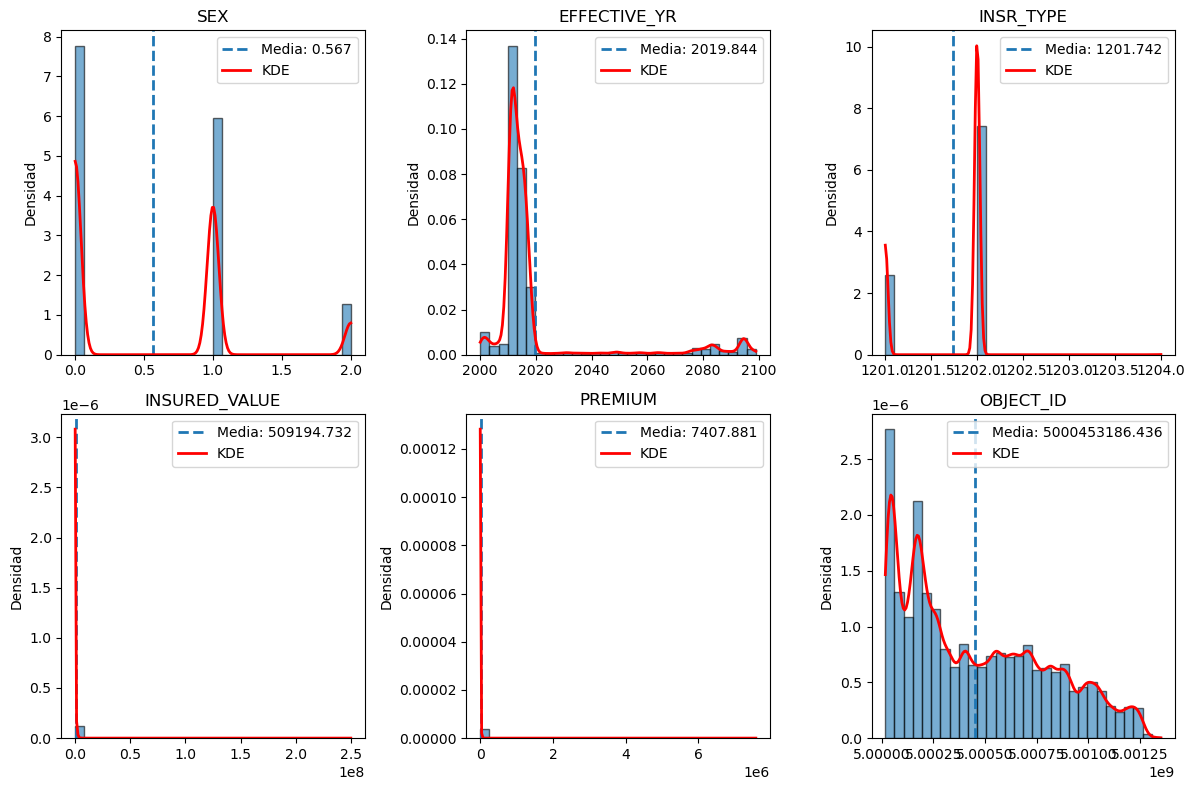

In [12]:
du.plot_hist_with_mean_and_kde(df,num_cols)

## Variables categóricas

### Estadísticas descriptivas

In [13]:
df.describe(include = "object").T

,count,unique,top,freq
TYPE_VEHICLE,801838,11,Truck,151055
MAKE,801833,797,TOYOTA,272622
USAGE,801838,14,Own Goods,219537


### Valores únicos y frecuencias

In [14]:
for col in cat_cols:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -----------\n")
    print(f"Valores únicos: {df[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts())

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'TYPE_VEHICLE' -----------

Valores únicos: ['Pick-up' 'Station Wagones' 'Truck' 'Bus' 'Automobile' 'Tanker'
 'Trailers and semitrailers' 'Motor-cycle' 'Tractor'
 'Special construction' 'Trade plates']

Frecuencias de los valores únicos de las categorías:


TYPE_VEHICLE
Truck                        151055
Pick-up                      144859
Motor-cycle                  143142
Automobile                   125961
Bus                          105962
Station Wagones               60782
Trailers and semitrailers     35939
Special construction          12077
Tractor                       11411
Tanker                        10632
Trade plates                     18
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'MAKE' -----------

Valores únicos: ['NISSAN' 'TOYOTA' 'IVECO' 'MITSUBISHI' 'MESFIN' 'FIAT' 'MARU' 'ISUZU'
 'MERCEDES' 'ZZ' 'RANGEROVER' 'BMW' 'YAMAHA' 'SUZUKI' 'DAIHATSU TERIOS'
 'CALABRASE' 'DAF' 'FARID' 'TRAILER' 'SINO' 'ISUSU' 'MERCEEDICE' 'HOWO'
 'HIGHER' 'ISUZU FVR' 'FORD' 'PEUGEOT' 'TOMSON' 'MERCEEDES' 'VOLKSWAGON'
 'DAEWOO' 'VIBERTI' 'CALABRESE' 'ROZA' 'JIEFANG' 'RENAULT' 'CRANE'
 'TURBO BUS' 'BISHOFTU' 'SCANIA' 'TRAKKER' 'SCHMITZ' 'NATFA' 'ABAY'
 'ROLFO' 'INTERNATIONAL USE' 'MAZDA' 'NEW HOLLAND' 'NEW HOLAND' 'TURBO'
 'MACK' 'MTE' 'ORAL' 'DUNGFING' 'ZONGUSHEN' 'HYUNDAI' 'NAMI' 'NISSAN UD'
 'VOLVO' 'DATSUN' 'HIGER BUS' 'AEOLUS' 'LANDROVER' 'MUSSO' 'TATA'
 '330-30 TRA' 'EU. TRAILER' 'HINO' 'OPEL' 'VERYCA' 'AMBULANCE' 'ADGE'
 'CHEVROLET' 'LOWBED' 'MOTOR CYCLE (TWOCYCLE)' 'HONDA' 'LADA' 'DACIA'
 'KIA' 'GEEP' 'ALFA ROMIO' 'CACCIAMALLI' 'DAYUN' 'BELARUS' 'VOLKS WAGON'
 'RANDON' 'GMC' 'CORDES' 'HIGH BED TRAILER' 'JEEP' 'LAND ROVER'
 '330-30

MAKE
TOYOTA               272622
ISUZU                 75661
BAJAJI                67320
NISSAN                37183
MITSUBISHI            22093
                      ...  
M/CYCLE                   1
TELESCPIC HANDLER         1
England                   1
DIZER                     1
DONG FENGSHEN             1
Name: count, Length: 797, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'USAGE' -----------

Valores únicos: ['Own Goods' 'Private' 'General Cartage' 'Fare Paying Passengers' 'Taxi'
 'Car Hires' 'Own service' 'Agricultural Own Farm' 'Special Construction'
 'Others' 'Learnes' 'Ambulance' 'Agricultural Any Farm' 'Fire fighting']

Frecuencias de los valores únicos de las categorías:


USAGE
Own Goods                 219537
Private                   205060
General Cartage           125473
Fare Paying Passengers    118188
Own service                50509
Taxi                       46736
Others                      8961
Agricultural Own Farm       7909
Special Construction        6925
Agricultural Any Farm       3773
Ambulance                   3125
Learnes                     2927
Car Hires                   2608
Fire fighting                107
Name: count, dtype: int64

### Visualizaciones

Graficar gráficos de barras para variables categóricas

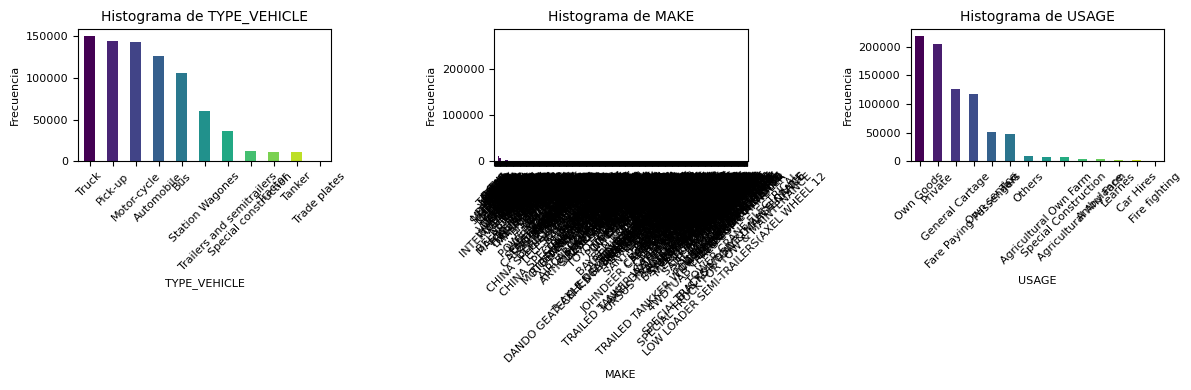

In [15]:
du.plot_categorical_histograms(df, cat_cols)

In [16]:
import importlib
import data_utils as du
importlib.reload(du)


<module 'data_utils' from '/Users/mavicairos/Library/Mobile Documents/com~apple~CloudDocs/ThePowerMBA/Proyectos/ProSafe_Auto_Insure/Notebook/data_utils.py'>

# Análisis de las variables tipo fecha

In [17]:
date_cols = ['INSR_BEGIN', 'INSR_END']  # Ajusta según tus columnas
resumen_fechas = du.date_column_summary(df, date_cols)
print(resumen_fechas)


      columna  min_fecha  max_fecha  rango_dias  n_nulos  n_unicos
0  INSR_BEGIN 2011-07-01 2018-06-30        2556        0      2556
1    INSR_END 2011-07-13 2019-06-29        2908        0      2834


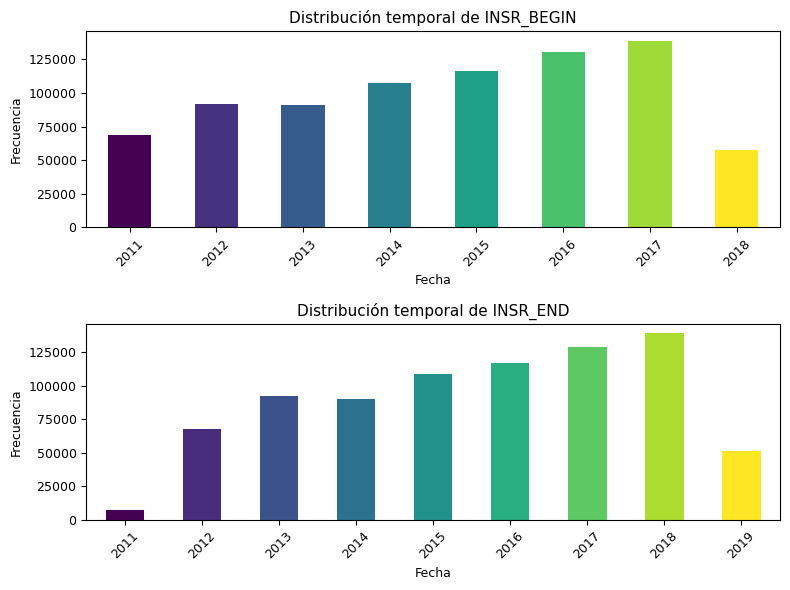

In [18]:
du.plot_date_distributions_subplots(df, date_cols, freq='Y', figsize=(8, 3), fontsize=9, palette='viridis')


In [19]:


# Crea una serie con el año de INSR_BEGIN
insr_begin_year = df['INSR_BEGIN'].dt.year

# Valida si EFFECTIVE_YR es igual al año de INSR_BEGIN (cuando ambos existen)
coinciden = (df['EFFECTIVE_YR'].dropna().astype(float) == insr_begin_year[df['EFFECTIVE_YR'].notna()]).all()
print(f"¿EFFECTIVE_YR coincide con el año de INSR_BEGIN? {coinciden}")


¿EFFECTIVE_YR coincide con el año de INSR_BEGIN? False


In [20]:
# Crea una serie con el año de INSR_BEGIN
insr_begin_year = df['INSR_BEGIN'].dt.year

# Filtra donde EFFECTIVE_YR no es nulo y no coincide con INSR_BEGIN
mask = (df['EFFECTIVE_YR'].notna()) & (df['EFFECTIVE_YR'].astype(float) != insr_begin_year)
diferentes = df.loc[mask, ['INSR_BEGIN', 'EFFECTIVE_YR']]
print(f"Registros donde EFFECTIVE_YR no coincide con INSR_BEGIN:\n{diferentes.head(10)}")
print(f"Total de diferencias: {diferentes.shape[0]}")


Registros donde EFFECTIVE_YR no coincide con INSR_BEGIN:
   INSR_BEGIN  EFFECTIVE_YR
0  2013-08-08          2008
1  2012-08-08          2008
2  2011-08-08          2008
3  2011-07-08          2008
4  2013-08-08          2008
5  2012-08-08          2008
6  2011-08-08          2008
7  2011-07-08          2008
8  2012-07-08          2011
10 2011-07-08          2001
Total de diferencias: 519342


In [21]:
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'], errors='coerce')
df['INSR_END'] = pd.to_datetime(df['INSR_END'], errors='coerce')

duracion = (df['INSR_END'] - df['INSR_BEGIN']).dt.days
print(f"Promedio de duración de póliza: {duracion.mean():.1f} días")
print(f"Moda de duración: {duracion.mode()[0]} días")
print(f"Porcentaje de pólizas con duración entre 360 y 370 días: {(duracion.between(360, 370).mean()*100):.2f}%")


Promedio de duración de póliza: 351.4 días
Moda de duración: 364 días
Porcentaje de pólizas con duración entre 360 y 370 días: 94.49%


## Matriz de correlación

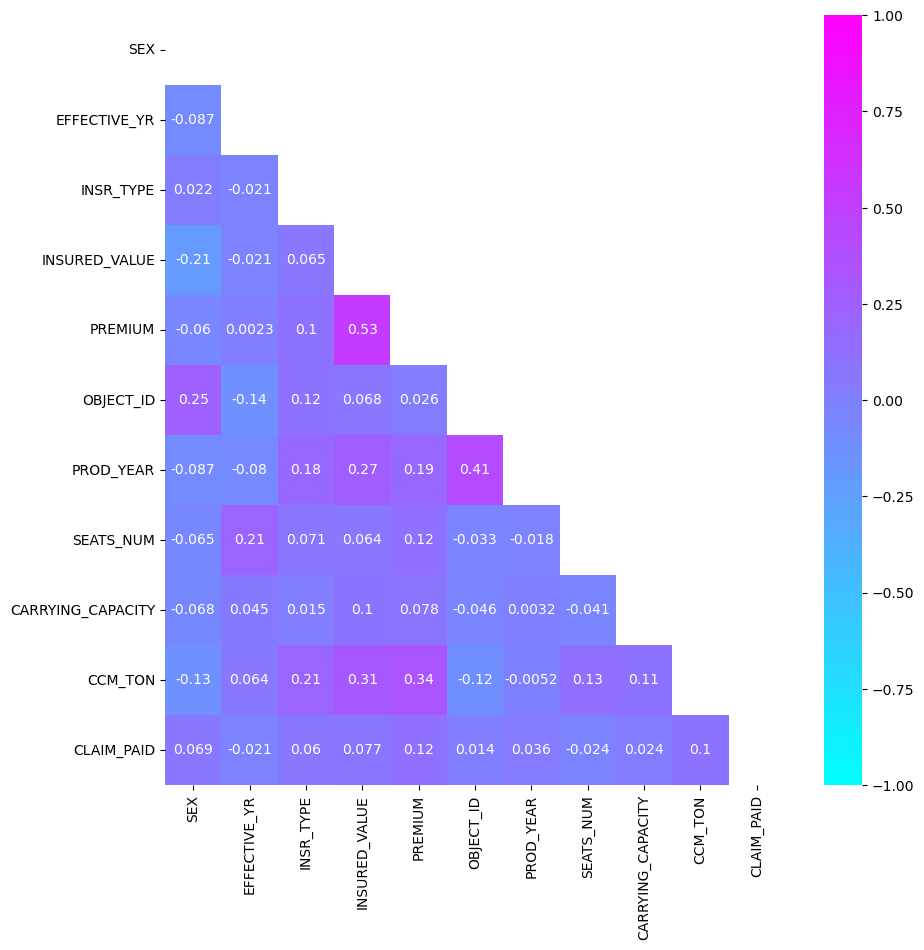

In [22]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear la figura
plt.figure(figsize=(10, 10))

# Crear una máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matrix, 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            mask=mask,
            cmap='cool')

plt.show()

## Relaciones cruzadas

### Variable objetivo numérica `CLAIM_PAID`

Generamos gráficos de dispersión

In [23]:
print(df.columns)

Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')


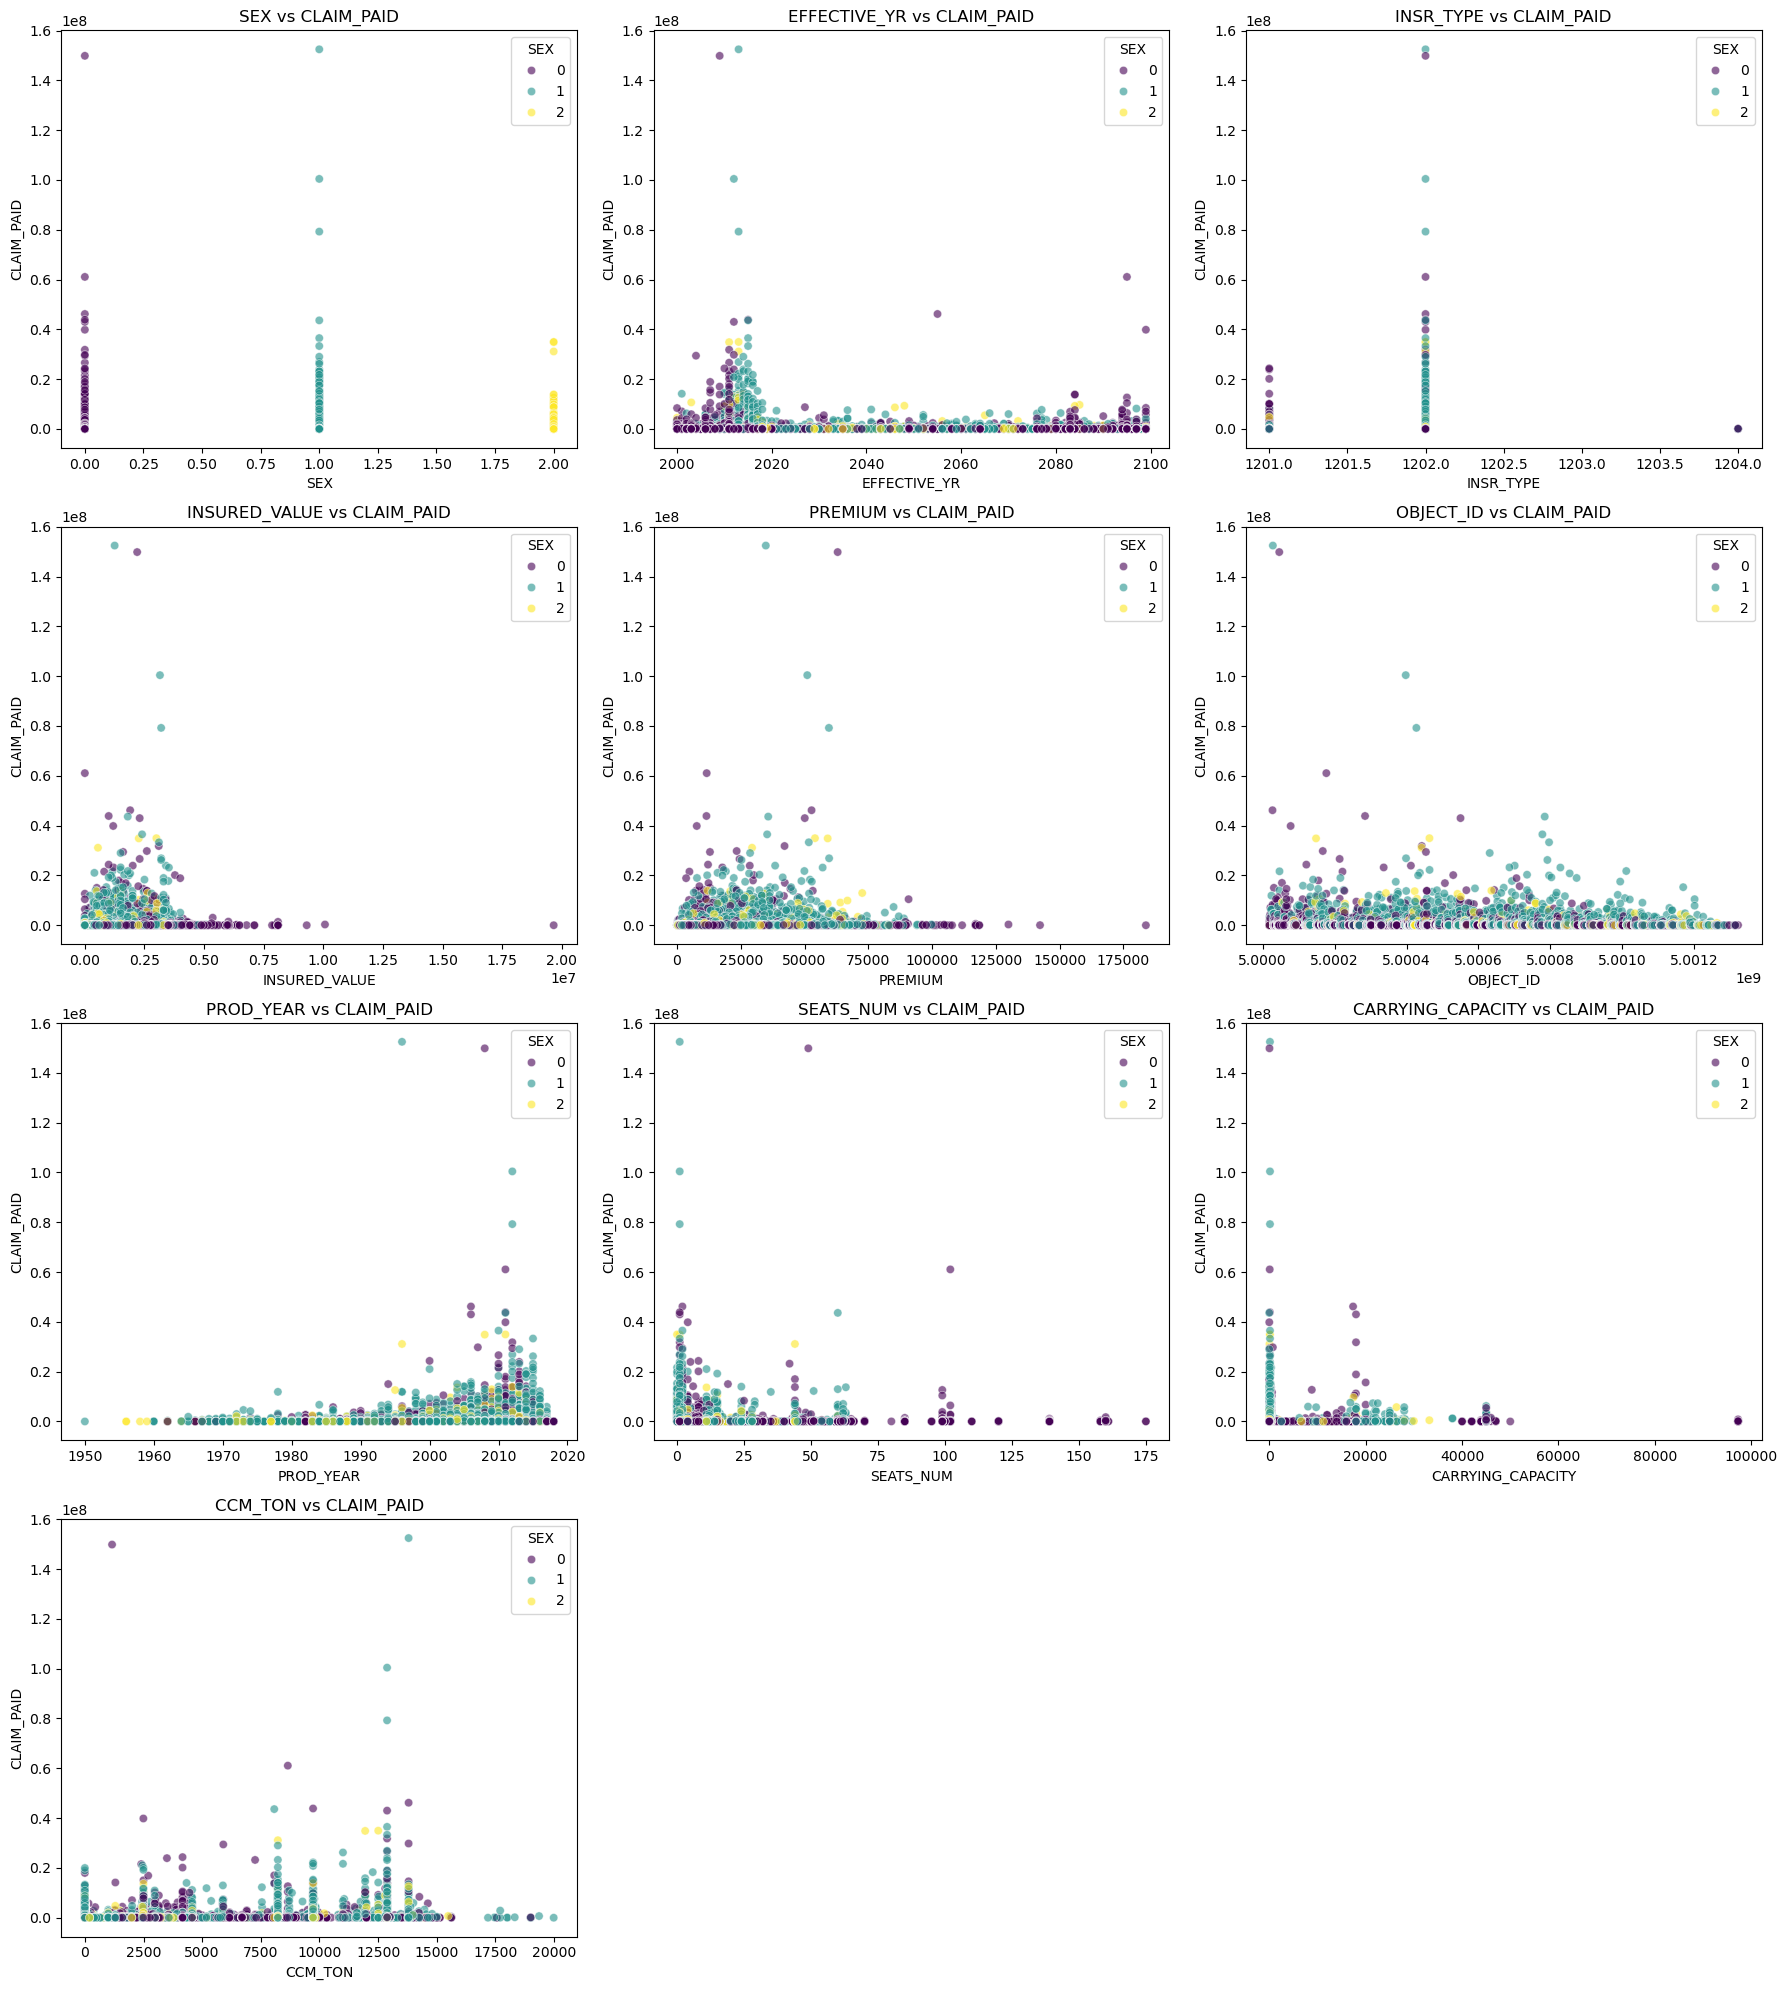

In [24]:
# Variable objetivo
tv = 'CLAIM_PAID'

# Resetear índice para evitar duplicados
df = df.reset_index(drop=True)

# DataFrame sólo con las variables numéricas predefinidas (excepto la target)
df_num = df[num_cols].drop(columns=[tv], errors='ignore')
cols_num = df_num.columns.tolist()

# Configura la cuadrícula de subplots
n = len(cols_num)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()

# Dibuja cada scatter en su propio subplot
for ax, col in zip(axes, cols_num):
    sns.scatterplot(
        x=df[col],
        y=df[tv],
        hue=df['SEX'],
        palette='viridis',
        alpha=0.6,
        ax=ax
    )
    ax.set_title(f'{col} vs {tv}')
    ax.set_xlabel(col)
    ax.set_ylabel(tv)

# Oculta ejes sobrantes si los hay
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/3634573310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


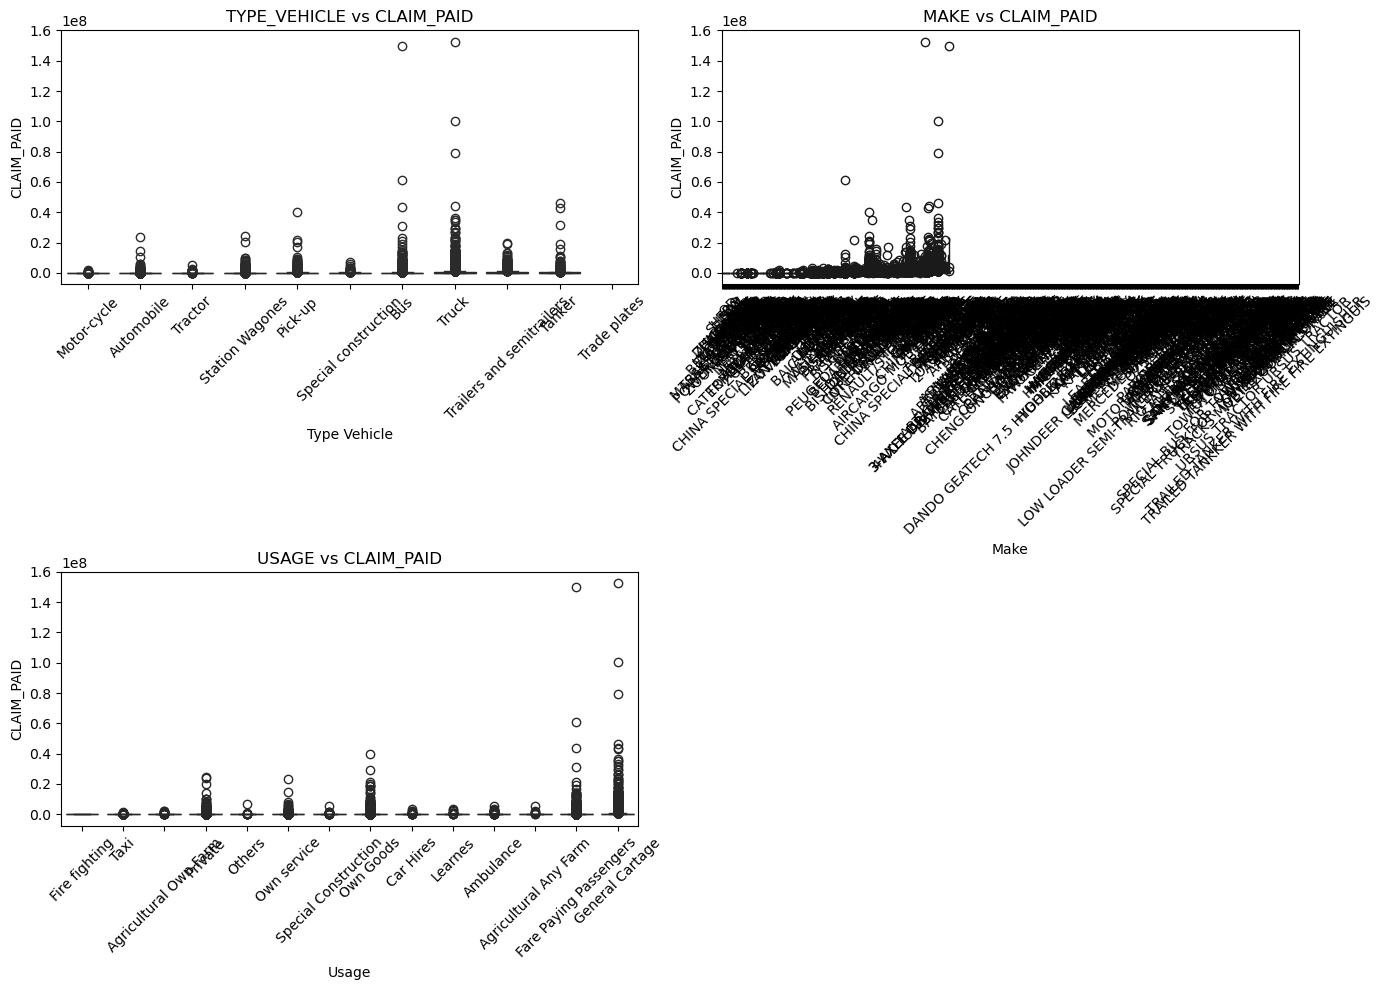

In [25]:
# Gráfico de caja para variables categóricas vs variable objetivo
# Prepara la cuadrícula de subplots
n = len(cat_cols)
ncols = 2
nrows = int(np.ceil(n / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    # Orden de categorías según la media de la nota_final
    ordered = df.groupby(col)[tv].mean().sort_values().index
    
    sns.boxplot(
        x=col,
        y=tv,
        data=df,
        order=ordered,
        palette='viridis',
        ax=ax
    )
    ax.set_title(f'{col} vs {tv}')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel(tv)
    ax.tick_params(axis='x', rotation=45)

# Oculta ejes sobrantes si hay alguno
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

---

### Relación de la variable objetivo con la variables categóricas

/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/619951925.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/619951925.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/619951925.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000gn/T/ipykernel_37176/619951925.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/var/folders/s8/l3j5zms14s71b3h4v6d7qkl00000g

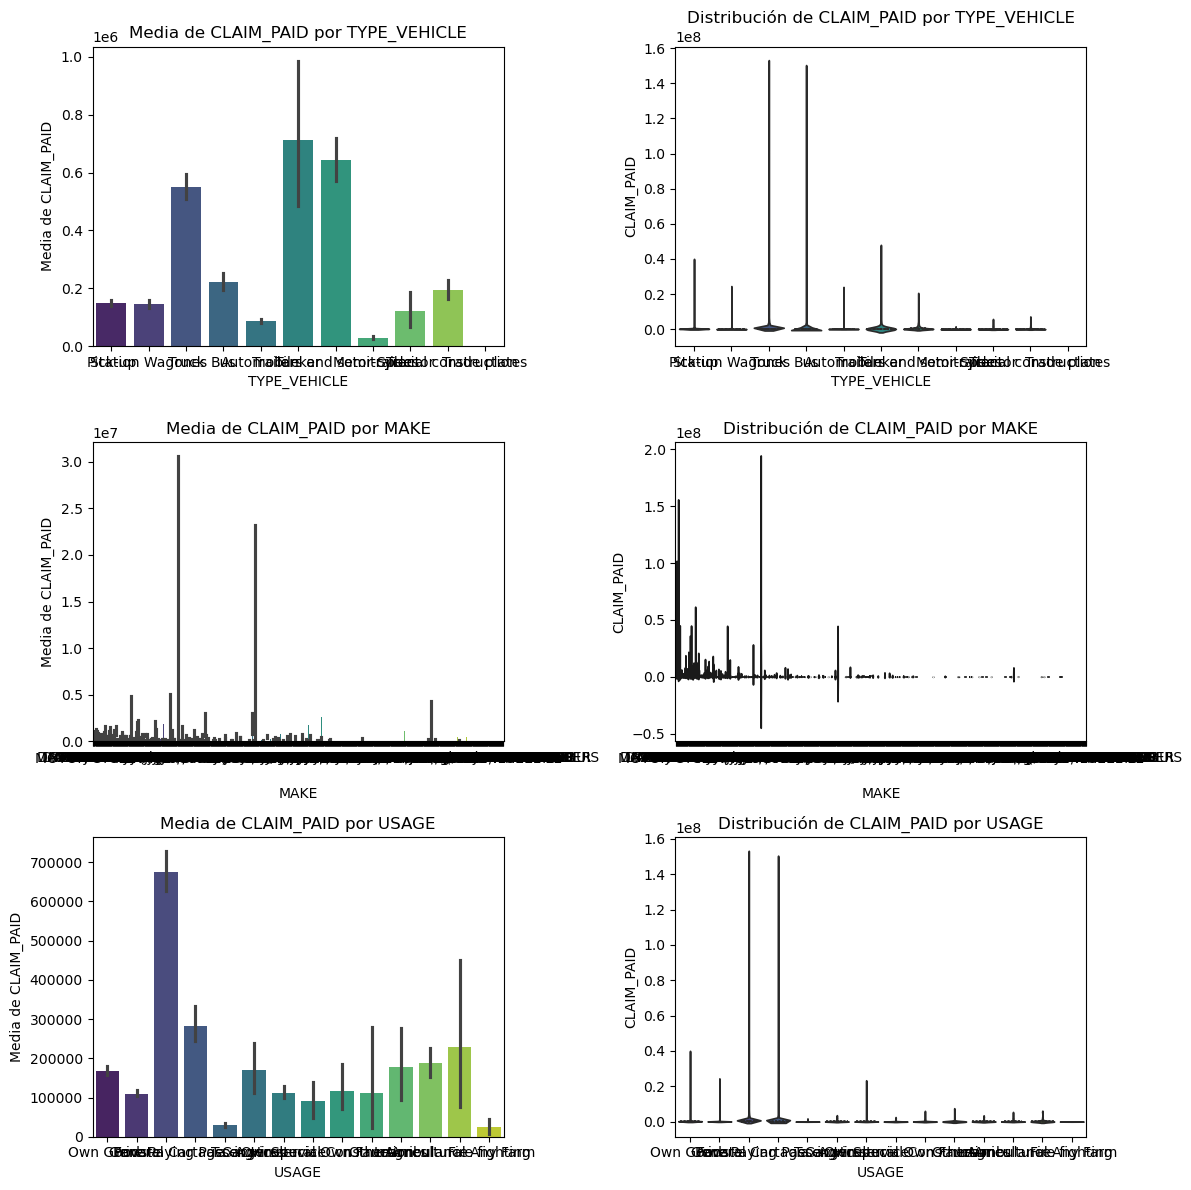

In [26]:
# Gráficos de barras y violines para variables categóricas vs variable objetivo

# en el top de tu script
df = df.reset_index(drop=True)


tv = 'CLAIM_PAID'
cats = [c for c in cat_cols if c != tv]
n = len(cats)

# Ajusta altura: por ejemplo 4 pulgadas de alto por variable
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 4 * n), squeeze=False)

for i, col in enumerate(cats):
    # 1) Barplot de medias ± IC95%
    sns.barplot(
        x=col, y=tv, data=df,
        ci=95, palette="viridis",
        ax=axes[i, 0]
    )
    axes[i, 0].set_title(f"Media de {tv} por {col}")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel(f"Media de {tv}")

    # 2) Violinplot con cuartiles
    sns.violinplot(
        x=col, y=tv, data=df,
        palette="viridis", inner="quartile",
        ax=axes[i, 1]
    )
    axes[i, 1].set_title(f"Distribución de {tv} por {col}")
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel(tv)

plt.tight_layout()
plt.show()



## Análisis de incosinstencias

In [27]:
# Análisis de inconsistencias en el DataFrame
# REGLA 1: Control de valores extremos en CLAIM_PAID
# Revisa siniestros superiores a un umbral arbitrario (ej. 10 veces el valor asegurado o más de 10 millones si no hay valor asegurado)

extremos = df[
    (df['CLAIM_PAID'] > 1e7) | 
    ((df['INSURED_VALUE'] > 0) & (df['CLAIM_PAID'] > df['INSURED_VALUE'] * 10))
]

print(f"Regla 1 - Registros con siniestros de importe inusualmente alto: {extremos.shape[0]} encontrados")
display(extremos[['CLAIM_PAID', 'INSURED_VALUE', 'PREMIUM', 'TYPE_VEHICLE', 'USAGE']])


# REGLA 2: Coherencia entre tipo de vehículo, uso y siniestralidad
# Ejemplo: Motos o automóviles con siniestros superiores a cierto umbral

inconsistentes_tipo_uso = df[
    (df['TYPE_VEHICLE'].isin(['Motorcycle', 'Automobile'])) & 
    (df['CLAIM_PAID'] > 1e7)
]

print(f"\nRegla 2 - Vehículos pequeños con siniestros inusualmente altos: {inconsistentes_tipo_uso.shape[0]} encontrados")
display(inconsistentes_tipo_uso[['CLAIM_PAID', 'TYPE_VEHICLE', 'USAGE']])


# REGLA 3: Inconsistencias de fechas
# - Año de fin de póliza menor al de inicio
# - Año de fabricación fuera de rango lógico

fechas_invalidas = df[
    (df['INSR_END'] < df['INSR_BEGIN']) |
    (df['PROD_YEAR'] < 1950) | (df['PROD_YEAR'] > 2025)
]

print(f"\nRegla 3 - Registros con fechas incoherentes: {fechas_invalidas.shape[0]} encontrados")
display(fechas_invalidas[['PROD_YEAR', 'INSR_BEGIN', 'INSR_END']])


# REGLA 4: Limpieza de marcas (MAKE)
# Detecta marcas con muy pocos registros o posibles inconsistencias de formato

# Limpieza básica
df['MAKE'] = df['MAKE'].str.strip().str.upper()

# Conteo de marcas
conteo_marcas = df['MAKE'].value_counts()

# Marcas con menos de 10 registros o marcas con caracteres sospechosos
marcas_raras = conteo_marcas[conteo_marcas < 10].index.tolist()
df_marcas_raras = df[df['MAKE'].isin(marcas_raras)]

print(f"\nRegla 4 - Registros con marcas poco frecuentes o sospechosas: {df_marcas_raras.shape[0]} encontrados")
display(df_marcas_raras[['MAKE', 'CLAIM_PAID']])

Regla 1 - Registros con siniestros de importe inusualmente alto: 225 encontrados


,CLAIM_PAID,INSURED_VALUE,PREMIUM,TYPE_VEHICLE,USAGE
635,15030238.40,500000.0,12978.23,Bus,Own service
1888,677867.85,50000.0,2197.92,Trailers and semitrailers,General Cartage
3309,1514662.09,100000.0,2452.80,Trailers and semitrailers,General Cartage
4753,2271057.42,145000.0,1630.62,Automobile,Private
5652,3269964.60,298000.0,8740.75,Trailers and semitrailers,General Cartage
...,...,...,...,...,...
742401,10346065.02,3300000.0,52526.96,Truck,General Cartage
783101,15283861.39,1600000.0,44720.40,Truck,General Cartage
784911,10466317.96,2500000.0,18520.25,Truck,General Cartage
786364,4170900.30,300000.0,4561.30,Trailers and semitrailers,General Cartage



Regla 2 - Vehículos pequeños con siniestros inusualmente altos: 3 encontrados


,CLAIM_PAID,TYPE_VEHICLE,USAGE
50048,10139393.15,Automobile,Private
237335,23924429.83,Automobile,Private
552913,14152540.80,Automobile,Private



Regla 3 - Registros con fechas incoherentes: 0 encontrados


,PROD_YEAR,INSR_BEGIN,INSR_END



Regla 4 - Registros con marcas poco frecuentes o sospechosas: 1412 encontrados


,MAKE,CLAIM_PAID
1997,330-30 TRA,NaN
1998,330-30 TRA,NaN
1999,330-30 TRA,NaN
2151,VERYCA,NaN
2152,VERYCA,NaN
...,...,...
801674,DFM,58217.74
801689,DFM,NaN
801710,FENGXING,NaN
801725,DFM,NaN


Guardamos el dataframe de nuevo

In [28]:
# Solo hacemos set_index si OBJECT_ID es una columna
if 'OBJECT_ID' in df.columns:
    df = df.set_index('OBJECT_ID')

# Confirmamos que OBJECT_ID es el índice
print("Índice actual:", df.index.name)

# Guardamos asegurando que el índice se incluya en el archivo
df.to_csv('../data/motor_data_2011_2018_EDA.csv', index_label='OBJECT_ID')


Índice actual: OBJECT_ID
